In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather -   
    1: Clear, Few clouds, Partly cloudy, Partly cloudy   
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    
temp - temperature in Celsius   
atemp - "feels like" temperature in Celsius   
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [23]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sampleSubmission.csv')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [25]:
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [26]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [27]:
train.isnull().sum() ## null 은 없음 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [28]:
train.workingday.count()

10886

In [29]:
train['datetime'] = train['datetime'].astype('datetime64[ns]') 

In [30]:
test['datetime'] = test['datetime'].astype('datetime64[ns]') 

In [31]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [32]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [33]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'rent count / hour')]

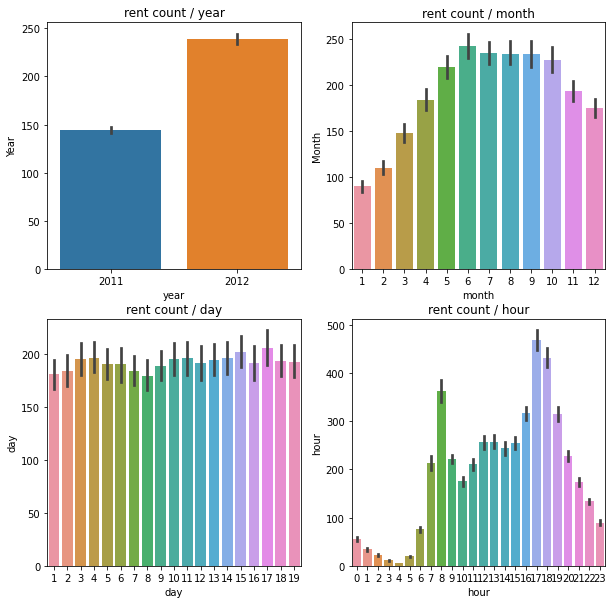

In [34]:
## year, month, day, hour
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(10,10)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

ax1.set(ylabel = 'Year', title = 'rent count / year')
ax2.set(ylabel = 'Month', title = 'rent count / month')
ax3.set(ylabel = 'day', title = 'rent count / day')
ax4.set(ylabel = 'hour', title = 'rent count / hour')

In [35]:
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
print(len(train[(train.holiday==0) & (train.workingday==1)]) / len(train) * 100 , "%") ## 평일
print(len(train[(train.holiday==0) & (train.workingday==0)]) / len(train) * 100 , "%") ## 주말
print(len(train[(train.holiday==1) & (train.workingday==0)]) / len(train) * 100 , "%") ## 공휴일
print(len(train[(train.holiday==0) & (train.workingday==0)]) / len(train) * 100 + len(train[(train.holiday==1) & (train.workingday==0)]) / len(train) * 100 , "%") ## 공휴일
print(len(train[(train.holiday==1) & (train.workingday==1)]) / len(train) * 100 , "%") ## X

## -> 평일에 타는 날이 제일 많다
## holiday 일자가 적기때문에 의미가 있는지는....

68.08745177291935 %
29.05566783024068 %
2.856880396839978 %
31.912548227080656 %
0.0 %


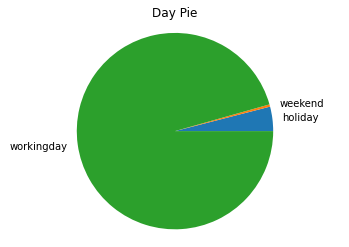

In [36]:
labels = ['holiday', 'weekend', 'workingday']
sizes = [len(train[(train.holiday==1) & (train.workingday==0)]), len(train[(train.holiday==0) & (train.workingday==0)]) / len(train) * 100, len(train[(train.holiday==0) & (train.workingday==1)])]

fig,ax = plt.subplots()
ax.pie(sizes,
      labels = labels)

ax.axis('equal') 
ax.set_title('Day Pie')


plt.show()

In [37]:
### 0 is Monday and 6 is Sunday
train['dayofweek'] = train.datetime.dt.dayofweek
test['dayofweek'] = test.datetime.dt.dayofweek
train.dayofweek.value_counts() ## -> 요일별로 확인하기

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

[Text(0, 0.5, 'dayofweek'), Text(0.5, 1.0, 'rent count / dayofweek')]

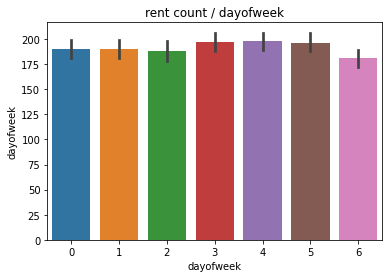

In [38]:
fig,ax = plt.subplots()
sns.barplot(data = train, x = 'dayofweek', y='count', ax = ax)
ax.set(ylabel='dayofweek', title = 'rent count / dayofweek') 
### 요일도 크게 상관없이 타고 있음

<AxesSubplot:xlabel='hour', ylabel='count'>

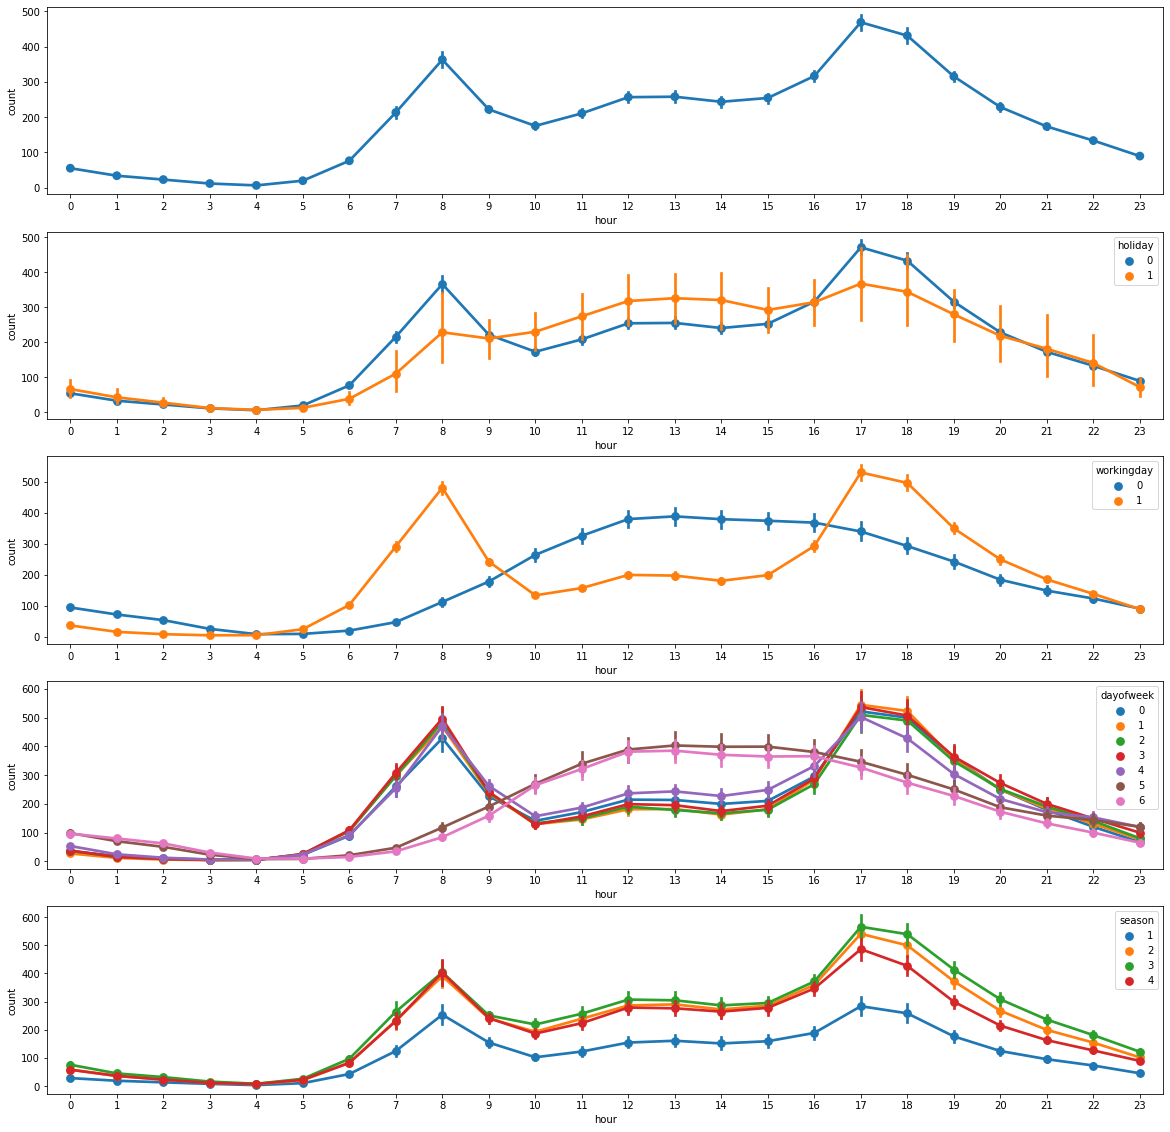

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1)
fig.set_size_inches(20,20)
sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax5)

## 평일은 출퇴근시간, 휴일은 오후경에 많이 탄다
## holiday, workingday, dayofweek, season 다 의미 있음 

In [40]:
train.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

[Text(0, 0.5, 'windspeed'), Text(0.5, 1.0, 'windspeed count')]

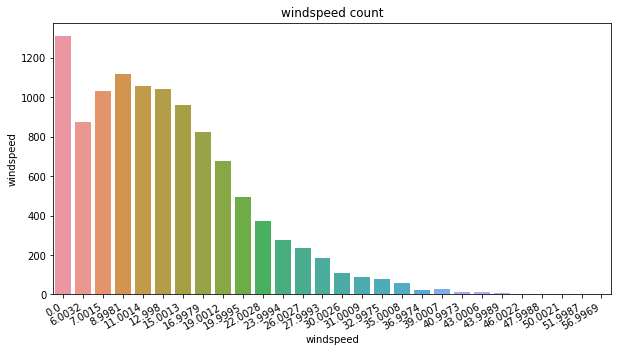

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = train, x = 'windspeed')
ax.set(ylabel = 'windspeed', title = 'windspeed count')

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
def predictWinds(data):
    datawinds0 = data.loc[data.windspeed == 0]
    datawindsNot0 = data.loc[data.windspeed != 0]
    
    wcol = ['season','weather','humidity', 'month','temp','atemp','year']
    
    datawindsNot0.windspeed = datawindsNot0.windspeed.astype("str")
    
    rfModel_wind = RandomForestClassifier()
    
    rfModel_wind.fit(datawindsNot0[wcol], datawindsNot0['windspeed'])
    
    windspeed0 = rfModel_wind.predict(X = datawinds0[wcol])
    
    predictWind0 = datawinds0
    predictWindNot0 = datawindsNot0
    
    predictWind0['windspeed'] = windspeed0
    data = predictWindNot0.append(predictWind0)
    
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(drop = True, inplace = True)
    
    
    return data

In [53]:
train = predictWinds(train)
train.head()

/var/folders/8q/g18mqmr12mz1zcgcy01fyqb00000gn/T/ipykernel_79472/257752828.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawindsNot0.windspeed = datawindsNot0.windspeed.astype("str")
/var/folders/8q/g18mqmr12mz1zcgcy01fyqb00000gn/T/ipykernel_79472/257752828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictWind0['windspeed'] = windspeed0
/var/folders/8q/g18mqmr12mz1zcgcy01fyqb00000gn/T/ipykernel_79472/257752828.py:19: FutureWarning: The frame.append method is deprecated and will be removed

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,5


In [54]:
train.windspeed.value_counts()

7.0015     1314
8.9981     1286
6.0032     1280
11.0014    1161
12.9980    1141
15.0013    1036
16.9979     886
19.0012     713
19.9995     524
22.0028     381
23.9994     282
26.0027     245
27.9993     198
30.0026     117
31.0009      90
32.9975      81
35.0008      61
39.0007      27
36.9974      22
40.9973      12
43.0006      12
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

<AxesSubplot:title={'center':'wind speed '}, xlabel='windspeed', ylabel='count'>

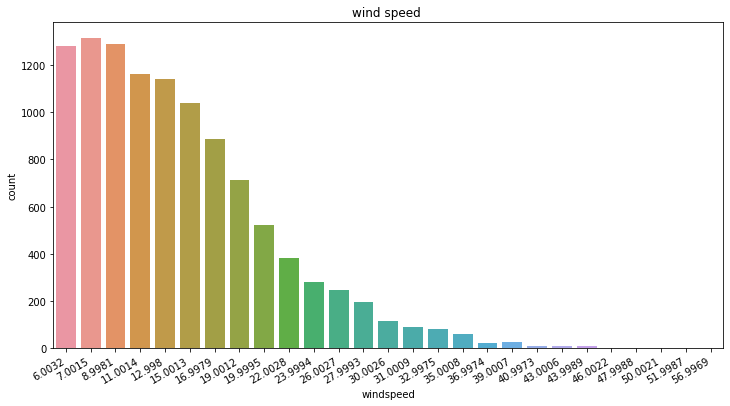

In [55]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel='Count', title = 'wind speed ')
sns.countplot(data = train, x = 'windspeed', ax= ax1)

### 

In [42]:
categorical_feature_names = ["season","holiday","workingday","weather",
                            "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

### training 

In [43]:
##관련 있는 컬럼 
## 월, 시간, workingday, holiday, season, 

In [44]:
feature_names = ['season','weather','temp','atemp','humidity','windspeed',
                'year','hour','dayofweek','holiday','workingday']

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [45]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,0.0,2011,0,5,0,0
1,1,1,9.02,13.635,80,0.0,2011,1,5,0,0
2,1,1,9.02,13.635,80,0.0,2011,2,5,0,0
3,1,1,9.84,14.395,75,0.0,2011,3,5,0,0
4,1,1,9.84,14.395,75,0.0,2011,4,5,0,0


In [46]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [47]:
label_name = "count"

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [48]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

#     if convertExp:
#         predicted_values = np.exp(predicted_values),
#         actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log1p(predicted_values)
    log_actual = np.log1p(actual_values)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

### K_Fold

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [56]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list = []

## 높이면 좀 더 좋은 성능 내는데, 시간 오래 걸림

model = RandomForestRegressor(n_estimators=100, 
                             n_jobs = -1,
                             random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [57]:
score = cross_val_score(model,X_train,y_train,cv=k_fold, scoring=rmsle_scorer)

In [58]:
score = score.mean() # 0에 근접할수록 좋음
print("Score = {0:.5f}".format(score))

Score = 0.33087


In [59]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [60]:
#예측

predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 11.48      ,   4.65      ,   4.18333333,   3.71      ,
         3.21      ,   6.53      ,  39.3       , 107.92      ,
       244.69      , 135.33      ])

In [61]:
submission = pd.read_csv("./data/sampleSubmission.csv")
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [62]:
submission['count'] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.480000
1,2011-01-20 01:00:00,4.650000
2,2011-01-20 02:00:00,4.183333
3,2011-01-20 03:00:00,3.710000
4,2011-01-20 04:00:00,3.210000


In [63]:
submission.to_csv("randomforest_{0:.5f}_submission.csv".format(score), index=False)
#submission.to_csv("submission.csv".format(score), index=False)

In [ ]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(X_train, y_train)
predict = model_ridge.predict(X_test)

In [ ]:
ridge_score = model_ridge.score(X_train, y_train)

In [ ]:
submission['count'] = prd
submission.to_csv('ridge_{0:.5f}_submission.csv'.format(ridge_score), index=False)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [70]:
lmodel = LinearRegression()

y_train_log = np.log1p(y_train)
lmodel.fit(X_train, y_train_log)

#정확도를 평가하는 것
preds = lmodel.predict(X_train)
print("RSMLE Value For Linear Regression : ",
     rmsle(np.exp(y_train_log), np.exp(preds), False))

RSMLE Value For Linear Regression :  0.9796533446288507


## 릿지

In [71]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [94]:
ridge_m_ = Ridge()
ridge_params_ = {'max_iter' : [3000], 'alpha' : [0.01, 0.1, 1,2,3,4,10,30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV( ridge_m_,
                           ridge_params_,
                           scoring = rmsle_scorer,
                           cv = 5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit(X_train, y_train_log)
preds = grid_ridge_m.predict(X_train)
print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression : ", rmsle(np.exp(y_train_log), np.exp(preds),False))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression :  0.9796533426169105


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

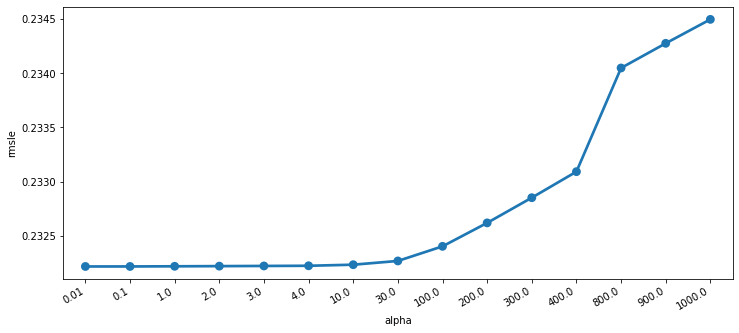

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df['alpha'] = df["params"].apply(lambda x : x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x : -x)

plt.xticks(rotation=30, ha = 'right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax = ax)

## 라쏘

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression: 0.9796664951910986


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

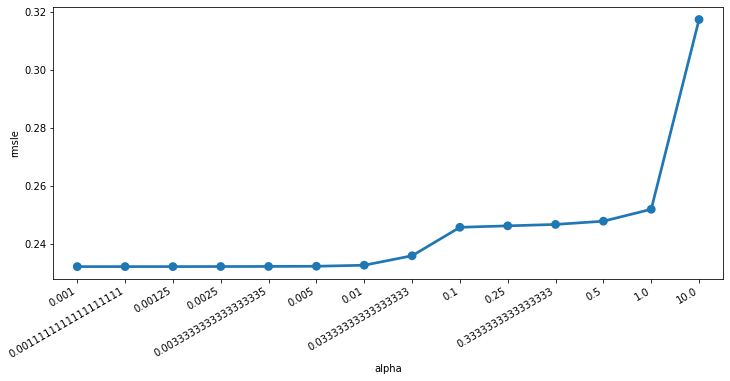

In [97]:
lasso_m_ = Lasso()
alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter':[3000], 'alpha' : alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_,scoring = rmsle_scorer, cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)
preds = grid_lasso_m.predict(X_train)

print(grid_lasso_m.best_params_)
print("RMSLE Value For Lasso Regression:", rmsle(np.exp(y_train_log), np.exp(preds),False))

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df["params"].apply(lambda x : x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x : -x)

plt.xticks(rotation=30, ha = 'right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax = ax)

In [93]:
### 앙상블모델 - 랜덤포레스트

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
print("RMSLE Value For Random Forest : ", rmsle(np.exp(y_train_log),np.exp(preds),False))

RMSLE Value For Random Forest :  0.10662081522779338


### 앙상블모델 - 그라디언트 부스트
- 여러개의 결정트리 묶어서 모델 만드는 것
- 1~5개의 깊지 않은 트리 사용 
- learning_rate : 오차 

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha = 0.01)

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds= gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds), False)
print("RMSLE Value For Gradient Boost : ", score)

RMSLE Value For Gradient Boost :  0.20417262895601523


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

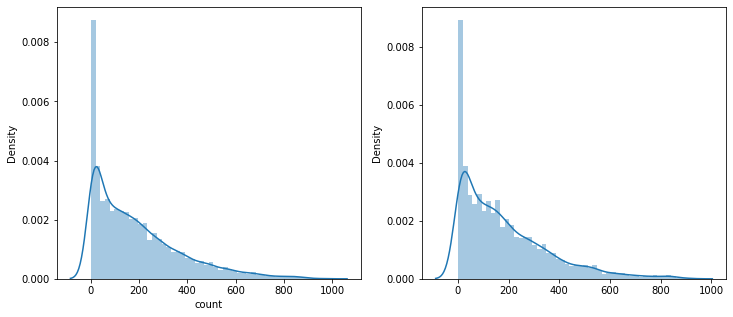

In [102]:
predsTest = rfModel.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax = ax1, bins = 50)
sns.distplot(np.exp(predsTest), ax= ax2, bins = 50)

### 타 모델 적용 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def ml_fit(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = cross_val_score(model,X_train,y_train,cv=k_fold, scoring=rmsle_scorer)
    print(model)
    print(score)
    return model

### SVC

In [ ]:
#model = ml_fit(SVC(gamma='scale'))
model = SVC(gamma = 'scale', random_state = 0)
score = cross_val_score(model,X_train,y_train,cv=k_fold, scoring=rmsle_scorer)
score = score.mean() # 0에 근접할수록 좋음
print("Score = {0:.5f}".format(score))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

In [ ]:
prediction.shape
submission = pd.read_csv("./data/bike-sharing-demand/sampleSubmission.csv")
submission
submission['count'] = prediction
submission.to_csv("Score_{0:.5f}_submission.csv".format(score), index=False)

### RandomForestRegressor

In [ ]:
#model = ml_fit(SVC(gamma='scale'))
model = RandomForestRegressor(n_estimators=100, 
                             n_jobs = -1,
                             random_state=0)
score = cross_val_score(model,X_train,y_train,cv=k_fold, scoring=rmsle_scorer)
score = score.mean() # 0에 근접할수록 좋음
print("Score = {0:.5f}".format(score))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

In [ ]:
submission = pd.read_csv("./data/bike-sharing-demand/sampleSubmission.csv")
submission
submission['count'] = prediction
submission.to_csv("randomforest_{0:.5f}_submission.csv".format(score), index=False)

### DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
score = cross_val_score(model,X_train,y_train,cv=k_fold, scoring=rmsle_scorer)
score = score.mean() # 0에 근접할수록 좋음
print("Score = {0:.5f}".format(score))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

In [ ]:
submission = pd.read_csv("./data/bike-sharing-demand/sampleSubmission.csv")
submission
submission['count'] = prediction
submission.to_csv("decisionTree_{0:.5f}_submission.csv".format(score), index=False)

### KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
score = cross_val_score(model,X_train,y_train,cv=k_fold, scoring=rmsle_scorer)
score = score.mean() # 0에 근접할수록 좋음
print("Score = {0:.5f}".format(score))
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

In [ ]:
submission = pd.read_csv("./data/bike-sharing-demand/sampleSubmission.csv")
submission
submission['count'] = prediction
submission.to_csv("kneighbors{0:.5f}_submission.csv".format(score), index=False)